Задание
Часть 1
Найти данные на сайте РосСтат или (https://rosstat.gov.ru) или на сайте: https://www.kaggle.com , распределение которых было бы близко к
a) нормальному (визуально выглядит как кривая Гаусса - «колокол»),

b) равномерному.

Найти распределение со смещенной медианой относительно среднего (~15% размаха) и несмещенной.

Посчитать описательные характеристики распределения выбранных данных (среднее, мода, медиана), дать визуальное представление данных (условное форматирование Excel, построить график рассеивания/гистограмму/круговую диаграмму).

Часть 2
Найти датасет с аномальными значениями, которые можно выявить, построив диаграмму размаха «ящик с усами». Попробовать выдвинуть гипотезу о причинах аномальности, которую можно подтвердить дальнейшими исследованиями, используя синтетические признаки (или корреляционный анализ и т.п.).

ИМПОРТ БИБЛИОТЕК

In [7]:
import pandas
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats


Загружаем исходные данные

In [3]:
data = pandas.read_csv('2023_GradesVsPeriodAttendance_01.csv')
data.head()

,school_name,student_id,grade,term_code,bellPeriod1_absences,bellPeriod2_absences,bellPeriod3_absences,bellPeriod4_absences,bellPeriod5_absences,bellPeriod6_absences,total_absences,bellPeriod1_markbook_mark,bellPeriod2_markbook_mark,bellPeriod3_markbook_mark,bellPeriod4_markbook_mark,bellPeriod5_markbook_mark,bellPeriod6_markbook_mark
0,West High School,DF2PJ1C35,9,Semester 1 Final,20,16,18,15,17,17,103,D,C,A,C,C,C
1,West High School,8MED60MM6,9,Semester 1 Final,50,11,10,12,10,15,108,B,C,A,C,A,A
2,West High School,ZCB232N6Q,9,Semester 1 Final,10,4,4,6,10,8,42,A,B,B,B,A,B
3,West High School,989OKS8ZG,9,Semester 1 Final,8,4,4,2,3,4,25,A,A,A,A,A,A
4,West High School,J6EM8W29X,9,Semester 1 Final,19,4,7,5,3,3,41,A,D,B,B,C,B


Распределение со смещенной медианой

Среднее: 93.7254635062192
Медиана: 76.0
Мода: 49


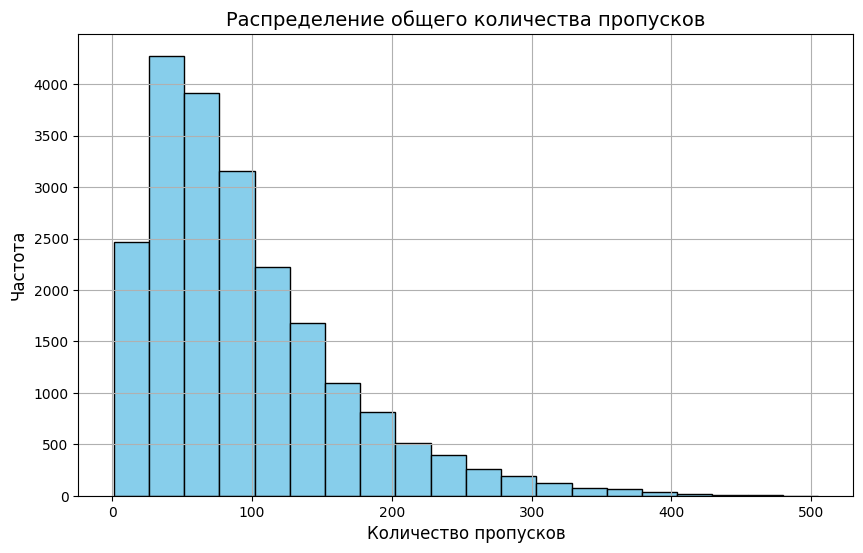

In [8]:
mean = data['total_absences'].mean()
median = data['total_absences'].median()
mode = data['total_absences'].mode().iloc[0]
print(f"Среднее: {mean}")
print(f"Медиана: {median}")
print(f"Мода: {mode}")

plt.figure(figsize=(10, 6))
plt.hist(data['total_absences'], bins=20, color='skyblue', edgecolor='black')
plt.title('Распределение общего количества пропусков', fontsize=14)
plt.xlabel('Количество пропусков', fontsize=12)
plt.ylabel('Частота', fontsize=12)
plt.grid(True)

plt.show()

График нормального распределения

C:\Users\Melli\AppData\Local\Temp\ipykernel_19956\1716221762.py:14: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "k" (-> color=(0.0, 0.0, 0.0, 1)). The keyword argument will take precedence.
  plt.plot(x, p, 'k', linewidth=2, color='red')  # Накладываем кривую нормального распределения


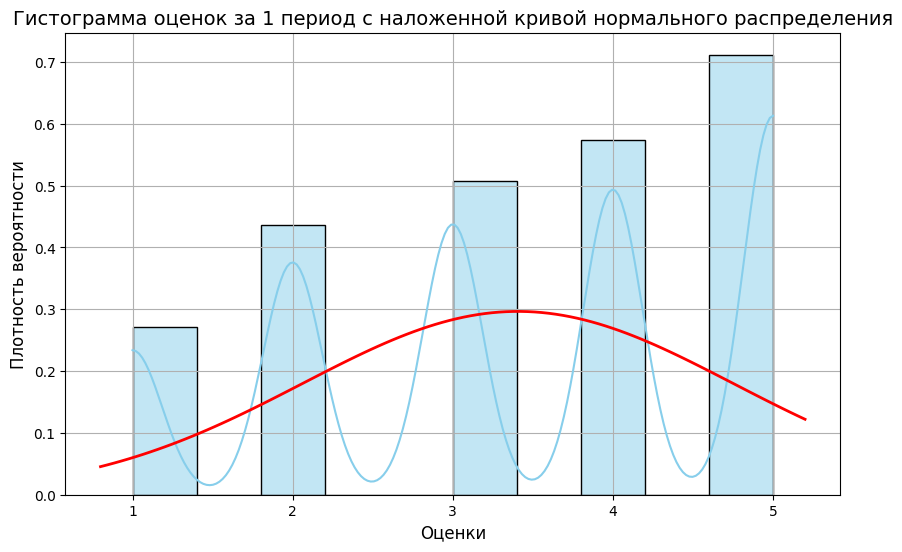

In [9]:
scores = data['bellPeriod1_markbook_mark'].dropna() 

plt.figure(figsize=(10, 6))
sns.histplot(scores, bins=10, kde=True, stat='density', color='skyblue', edgecolor='black')
plt.title('Гистограмма оценок за 1 период с наложенной кривой нормального распределения', fontsize=14)
plt.xlabel('Оценки', fontsize=12)
plt.ylabel('Плотность вероятности', fontsize=12)

# Наложение нормального распределения
mu, std = stats.norm.fit(scores)  # Подгоняем параметры нормального распределения
xmin, xmax = plt.xlim()  # Получаем пределы по оси x
x = np.linspace(xmin, xmax, 100)  # Генерируем значения x
p = stats.norm.pdf(x, mu, std)  # Плотность вероятности нормального распределения
plt.plot(x, p, 'k', linewidth=2, color='red')  # Накладываем кривую нормального распределения

plt.grid(True)
plt.show()

График равномерного распределения

C:\Users\Melli\AppData\Local\Temp\ipykernel_19956\203369278.py:12: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "k" (-> color=(0.0, 0.0, 0.0, 1)). The keyword argument will take precedence.
  plt.plot(x, p, 'k', linewidth=2, color='red', label='Равномерное распределение')


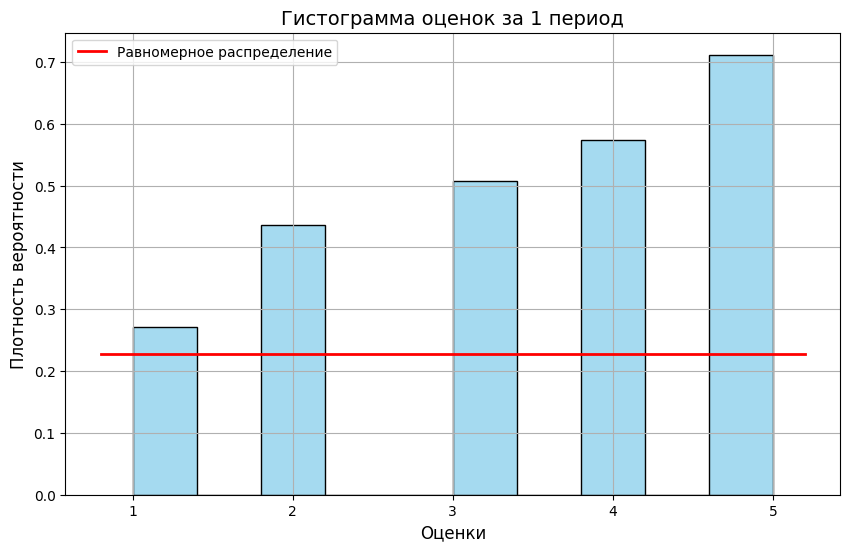

In [10]:
plt.figure(figsize=(10, 6))
sns.histplot(scores, bins=10, stat='density', color='skyblue', edgecolor='black')
plt.title('Гистограмма оценок за 1 период', fontsize=14)
plt.xlabel('Оценки', fontsize=12)
plt.ylabel('Плотность вероятности', fontsize=12)

# Наложение равномерного распределения

xmin, xmax = plt.xlim()
x = np.linspace(xmin, xmax, 100)
p = np.ones_like(x) / (xmax - xmin)  
plt.plot(x, p, 'k', linewidth=2, color='red', label='Равномерное распределение')

plt.legend()
plt.grid(True)
plt.show()

График рассеивания

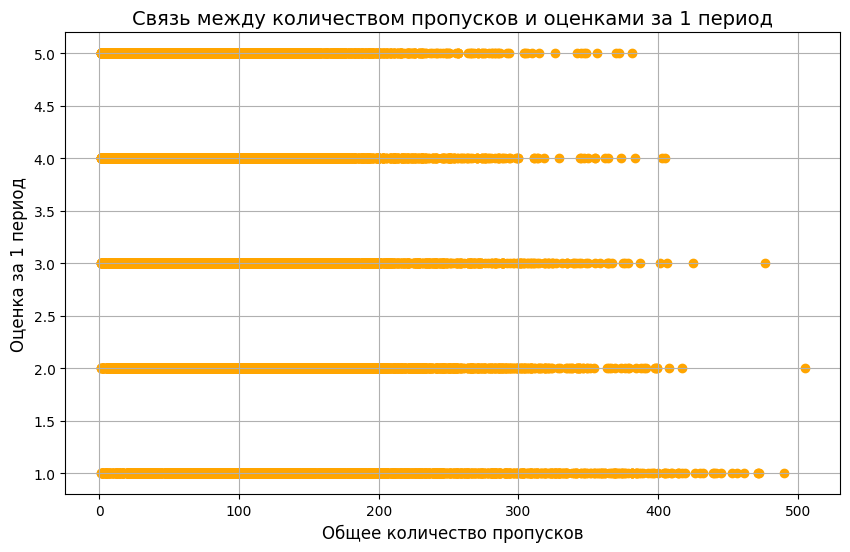

In [5]:
ocenki = {'A': 5, 'B': 4, 'C': 3, 'D': 2, 'F': 1}
data['bellPeriod1_markbook_mark'] = data['bellPeriod1_markbook_mark'].map(ocenki)

plt.figure(figsize=(10, 6))
plt.scatter(data['total_absences'], data['bellPeriod1_markbook_mark'], color='orange')
plt.title('Связь между количеством пропусков и оценками за 1 период', fontsize=14)
plt.xlabel('Общее количество пропусков', fontsize=12)
plt.ylabel('Оценка за 1 период', fontsize=12)
plt.grid(True)
plt.show()

Круговая диаграмма

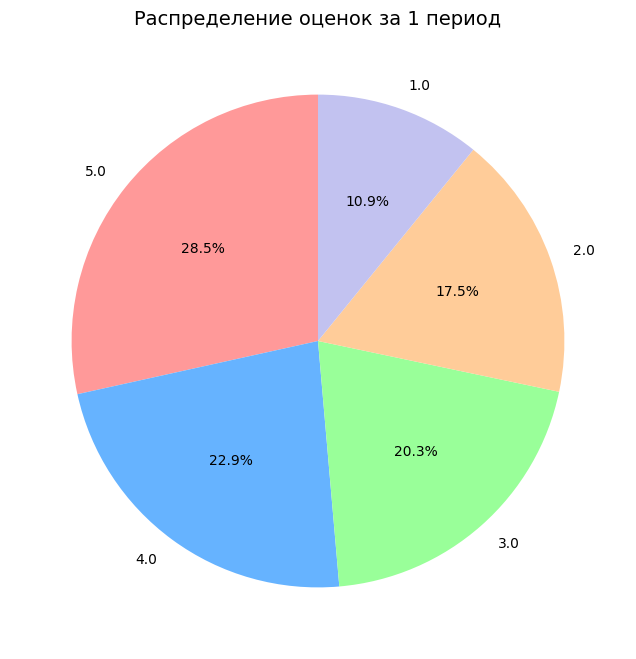

In [6]:
grade_counts = data['bellPeriod1_markbook_mark'].value_counts()

plt.figure(figsize=(8, 8))
plt.pie(grade_counts, labels=grade_counts.index, autopct='%1.1f%%', colors=['#ff9999','#66b3ff','#99ff99','#ffcc99', '#c2c2f0'], startangle=90)
plt.title('Распределение оценок за 1 период', fontsize=14)
plt.show()

Распределение с аномальными значениями

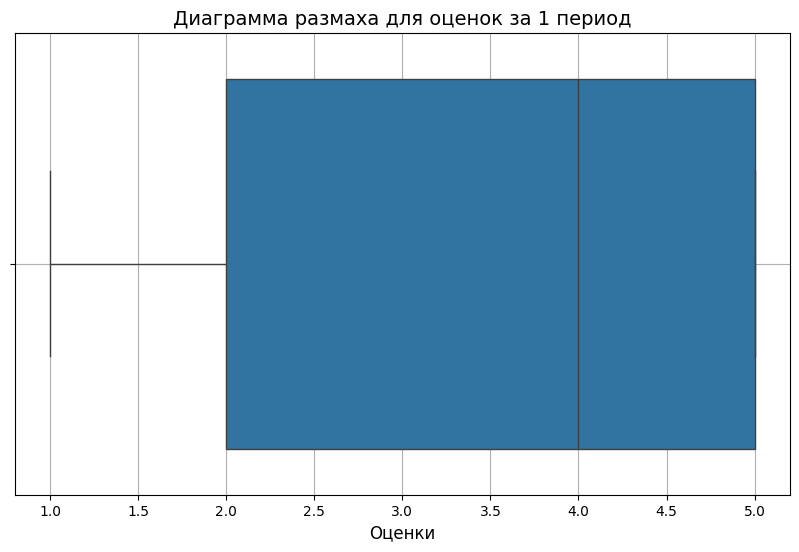

In [11]:
plt.figure(figsize=(10, 6))
sns.boxplot(x=data['bellPeriod1_markbook_mark'])  # Предположим, что это интересующий нас столбец
plt.title('Диаграмма размаха для оценок за 1 период', fontsize=14)
plt.xlabel('Оценки', fontsize=12)
plt.grid(True)
plt.show()